In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

### 1st task. Predict top1 power by 2025

In [2]:
dev = pd.read_csv('development.csv', header=None)
dev = dev.rename(columns={
    1: 'sum',
    3: 'top_1',
    5: 'top_500'
})

In [4]:
top1 = dev[[0, 'top_1']].append(pd.DataFrame(np.nan, index=[i for i in range(8)], columns=[0, 'top_1']), ignore_index=True)
top1.loc[64, 0] = pd.to_datetime('2025-5-1')

In [10]:
top1[0] = pd.to_datetime(top1[0])
top1['month'] = top1[0].dt.month
top1.loc[57:64,'month'] = [10, 5] * 4
top1['month'] = top1['month'].astype(int)
top1['year'] = top1[0].dt.year.interpolate().astype(int)
top1['day'] = 1
top1[0] = top1[0].fillna(pd.to_datetime(top1['year'].astype(str) + '-' + top1['month'].astype(str) + '-' + top1['day'].astype(str)))
top1['days_from_start'] = (top1[0] - top1[0][0]).dt.days

top1

,0,top_1,month,year,day,days_from_start
0,1993-05-01,59.7,5,1993,1,0
1,1993-10-01,124.0,10,1993,1,153
2,1994-05-01,143.4,5,1994,1,365
3,1994-10-01,170.0,10,1994,1,518
4,1995-05-01,170.0,5,1995,1,730
...,...,...,...,...,...,...
60,2023-05-01,NaN,5,2023,1,10957
61,2023-10-01,NaN,10,2023,1,11110
62,2024-05-01,NaN,5,2024,1,11323
63,2024-10-01,NaN,10,2024,1,11476


In [11]:
train = top1[['days_from_start', 'top_1']].dropna()
train['log_target'] = np.log(train['top_1'])
train

,days_from_start,top_1,log_target
0,0,5.970000e+01,4.089332
1,153,1.240000e+02,4.820282
2,365,1.434000e+02,4.965638
3,518,1.700000e+02,5.135798
4,730,1.700000e+02,5.135798
5,883,1.700000e+02,5.135798
6,1096,2.204000e+02,5.395444
7,1249,3.682000e+02,5.908626
8,1461,1.068000e+03,6.973543
9,1614,1.338000e+03,7.198931


In [12]:
lr = LinearRegression()
lr.fit(np.array(train['days_from_start']).reshape(-1, 1), train['log_target'])

LinearRegression()

In [13]:
preds = np.exp(lr.predict(np.array(top1[top1['top_1'].isna()]['days_from_start']).reshape(-1, 1)))
preds

array([1.57959092e+09, 2.22628335e+09, 2.85193289e+09, 4.01952850e+09,
       5.14913141e+09, 7.26896847e+09, 9.31175730e+09, 1.31240374e+10])

In [14]:
top1.loc[57:64, 'top_1'] = preds
top1

,0,top_1,month,year,day,days_from_start
0,1993-05-01,5.970000e+01,5,1993,1,0
1,1993-10-01,1.240000e+02,10,1993,1,153
2,1994-05-01,1.434000e+02,5,1994,1,365
3,1994-10-01,1.700000e+02,10,1994,1,518
4,1995-05-01,1.700000e+02,5,1995,1,730
...,...,...,...,...,...,...
60,2023-05-01,4.019528e+09,5,2023,1,10957
61,2023-10-01,5.149131e+09,10,2023,1,11110
62,2024-05-01,7.268968e+09,5,2024,1,11323
63,2024-10-01,9.311757e+09,10,2024,1,11476


In [131]:
top1.to_csv('top1_predicted.csv',index=False)

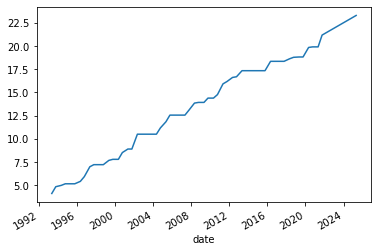

In [28]:
top1['log_top1'] = np.log(top1['top_1'])
top1 = top1.set_index(0)
top1.index = top1.index.rename('date')

top1['log_top1'].plot()

### 2nd task. Calculate share of supercomputers in whole world energy 

In [2]:
top500 = pd.read_csv('TOP500_202106.csv', sep=';', encoding='utf-8')
top500.head()

,Rank,Previous Rank,First Appearance,First Rank,Name,Computer,Site,Manufacturer,Country,Year,...,Accelerator/Co-Processor,Cores per Socket,Processor Generation,System Model,System Family,Interconnect Family,Interconnect,Continent,Site ID,System ID
0,1,1.0,55,1,Supercomputer Fugaku,"Supercomputer Fugaku, A64FX 48C 2.2GHz, Tofu i...",RIKEN Center for Computational Science,Fujitsu,Japan,2020,...,None,48,Fujitsu A64FX,Supercomputer Fugaku,Fujitsu Cluster,Proprietary Network,Tofu interconnect D,Asia,50 831,179807
1,2,2.0,51,1,Summit,"IBM Power System AC922, IBM POWER9 22C 3.07GHz...",DOE/SC/Oak Ridge National Laboratory,IBM,United States,2018,...,NVIDIA Volta GV100,22,IBM POWER9,IBM Power System AC922,IBM Power Systems,Infiniband,Dual-rail Mellanox EDR Infiniband,North America,48 553,179397
2,3,3.0,51,3,Sierra,"IBM Power System AC922, IBM POWER9 22C 3.1GHz,...",DOE/NNSA/LLNL,IBM / NVIDIA / Mellanox,United States,2018,...,NVIDIA Volta GV100,22,IBM POWER9,IBM Power System AC922,IBM Power Systems,Infiniband,Dual-rail Mellanox EDR Infiniband,North America,49 763,179398
3,4,4.0,47,1,Sunway TaihuLight,"Sunway MPP, Sunway SW26010 260C 1.45GHz, Sunway",National Supercomputing Center in Wuxi,NRCPC,China,2016,...,None,260,Sunway,Sunway MPP,Sunway Cluster,Custom Interconnect,Sunway,Asia,50 623,178764
4,5,NaN,57,5,Perlmutter,"HPE Cray EX235n, AMD EPYC 7763 64C 2.45GHz, NV...",DOE/SC/LBNL/NERSC,HPE,United States,2021,...,NVIDIA A100 SXM4 40 GB,64,AMD Milan,HPE Cray EX235n,HPE Cray EX,Gigabit Ethernet,Slingshot-10,North America,48 429,179972


In [4]:
top500['Power (kW)'] = top500['Power (kW)'].str.replace(',', '.').str.replace(u'\xa0', '').astype(float)

In [10]:
top500['Power (kW)'] = top500['Power (kW)'].interpolate()

In [18]:
top500_power = (top500['Power (kW)'].sum() * 8760) / 1e9
top500_power

7.546904293799999

In [20]:
world_power = 26823.248
world_power

26823.248

In [21]:
(top500_power / world_power) * 100

0.028135683992482938